# **Bank Marketing**

**Abstract:**
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

**Data Set Information:**
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to determine if the product (bank term deposit) would be subscribed ('yes') or not ('no').




In [1]:
!kaggle datasets download -d henriqueyamahata/bank-marketing

100%|█████████████████████████████████████████| 393k/393k [00:00<00:00, 533kB/s]
100%|█████████████████████████████████████████| 393k/393k [00:00<00:00, 533kB/s]


In [2]:
!unzip bank-marketing.zip

Archive:  bank-marketing.zip
  inflating: bank-additional-full.csv  
  inflating: bank-additional-names.txt  


In [4]:
import pandas as pd

df = pd.read_csv('./bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is:{col} and unique values are:{df[col].unique()}')



Name of Column is:job and unique values are:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is:marital and unique values are:['married' 'single' 'divorced' 'unknown']

Name of Column is:education and unique values are:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is:default and unique values are:['no' 'unknown' 'yes']

Name of Column is:housing and unique values are:['no' 'yes' 'unknown']

Name of Column is:loan and unique values are:['no' 'yes' 'unknown']

Name of Column is:contact and unique values are:['telephone' 'cellular']

Name of Column is:month and unique values are:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is:day_of_week and unique values are:['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is:poutcome and unique values are:['nonexisten

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2023-09-05 14:32:10.220242: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-05 14:32:10.352103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 14:32:11.010167: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
# function to returns categorical variables
def return_categorical(df):
    categorical_columns = [column_name for column_name in df if df[column_name].dtype == '0']
    return categorical_columns

# function return numerical variables
def return_numerical(df):
    return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    num_numerical_columns = len(numerical_columns)
    fig, axes = plt.subplots(1, num_numerical_columns, figsize=(70, 10))

    for i, numeric_column_name in enumerate(numerical_columns):
        sns.distplot(df[numeric_column_name], ax=axes[i])
        axes[i].set_title(f'Distribution of {numeric_column_name}')

def classifier(clf, x_train, x_test, y_train, y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    roc_test = roc_auc_score(y_test, y_test_pred, multi_class= 'ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class = 'ovr')
        
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)
    

    

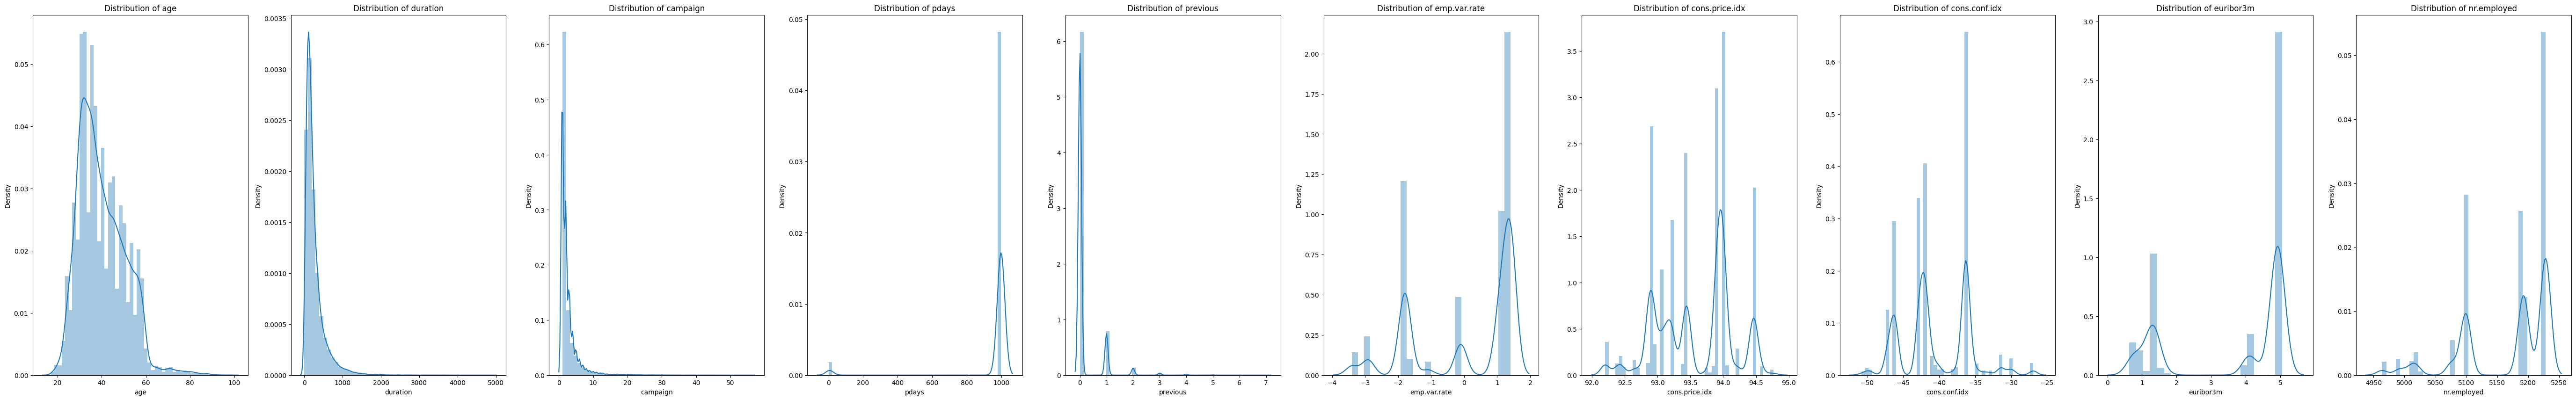

In [28]:
check_normal(df)

In [31]:
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
        fig = plt.figure(figsize=(30,10))
    else:
        fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + 'counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [35]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
corr = numeric_df.corr()  # Calculate the correlation matrix
corr_greater_than_75 = corr[corr >= 0.75]  # Filter for correlations greater than or equal to 0.75

In [36]:
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


<Axes: >

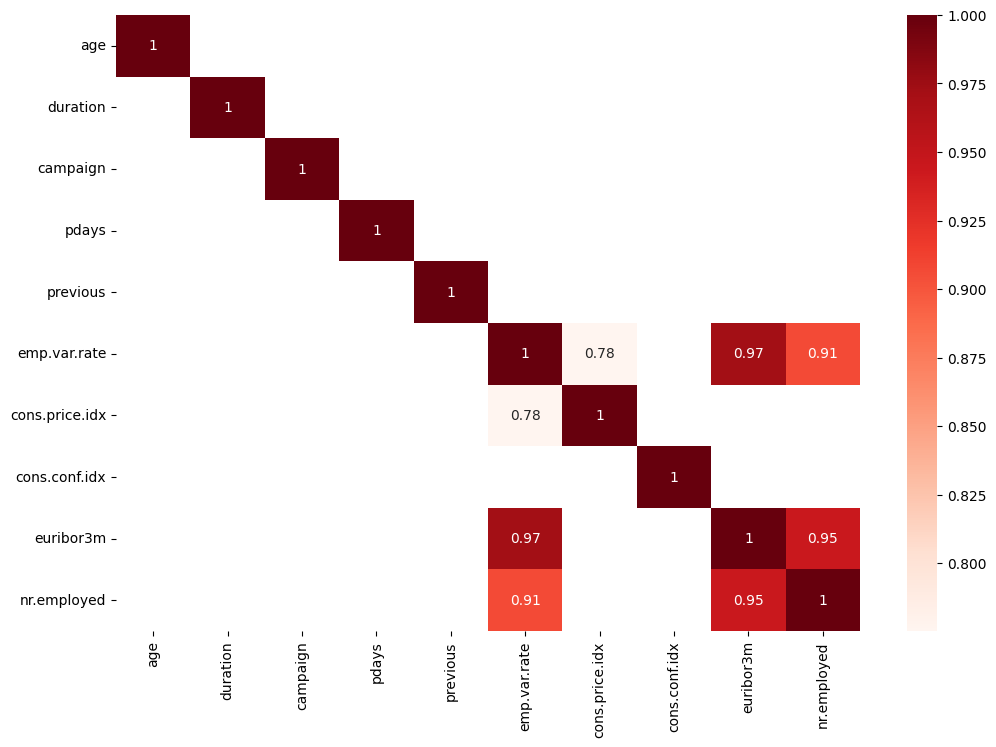

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap='Reds', annot=True)

- **campaign** : total menghubungi pada waktu kampanye
- **Pdays** : jumlah hari yang terlewat setelah terakhir dihubungi melalui kampanye (999 artinya klien belum dihubungi) 
- **previous** : jumlah kontak yang dilakukan sebelum kampanye
- **Poutcome** :hasil dari marketing campaign (categorical:'failure','nonexistent','success)

- **Employment Variation Rate (Emp.var.rate):** This tells us whether more people are getting jobs or if fewer people are losing their jobs. A positive number means more people are finding jobs, and a negative number means more people are losing jobs.

- **Consumer Price Index (Cons.price.idx):** This tracks whether things are getting more expensive or cheaper for regular people. If the index goes up, stuff is generally getting more expensive; if it goes down, stuff is getting cheaper.

- **Consumer Confidence Index (Cons.conf.idx):** Think of this as a measure of how confident people feel about the economy. If the index is high, people feel pretty good about the economy, which might make them spend more money. If it's low, people might be worried and spend less.

- **Euribor 3-Month Rate (Euribor3m):** This is like the interest rate for banks in Europe. It can affect how much it costs for banks to borrow money from each other. Changes in this rate can impact how much it costs for regular people and businesses to borrow money.

- **Number of Employees (Nr.employed):** This tells us how many people are working. If this number goes up, it means more people have jobs, which is generally good for the economy. If it goes down, it means fewer people are working, which can be a sign of economic trouble.


In [39]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [40]:
df['job'] = df['job'].apply(lambda x: -1 if x=='unknown' or x=='unemployed' else (15 if x=='entrepreneur' else (8 if x == 'blue-collar' else ( 6 if x=='technician' or x=='services' or  x=='admin.' or x=='management' else (4 if x== 'self-employed' or x=='student' else (2 if x=='housemaid' or x=='retired' else None) )))))
df['housing'] = df['housing'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['loan'] = df['loan'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['y'] = df['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['default'] = df['default'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))
df['poutcome'] = df['poutcome'].apply(lambda x: 0 if x=='failure' else (2 if x=='failure' else -1))
df['pdays'] = df['pdays'].apply(lambda x: 0 if x==999 else(20 if x<=10 else(6 if x<=20 else 3)))

In [41]:
df.drop(['day_of_week','contact','month'], axis=1, inplace=True)

In [42]:
df = pd.get_dummies(df, drop_first=True)

In [43]:
x = df.drop('y', axis=1)
y = df['y']
x.sample()

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [45]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)

print('Original dataset', len(x_train))
print('Resampled dataset', len(x_smote))

Original dataset 30891
Resampled dataset 54808


In [46]:
(x_train.shape[1])

25

### **Modelling with KKN**

In [48]:
s = StandardScaler()

In [49]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(s.fit_transform(x_train),y_train)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test), y_smote,y_test)

Train accuracy is: 0.5908079112538316
Test accuracy is: 0.9001650966300865

Train ROC is: 0.5908079112538316
Test ROC is: 0.5890717205449058

F score is: 0.29685362517099867
Precision is: 0.7022653721682848
Recall is: 0.18820468343451865


### **Tuning hyperparameter** 

In [50]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(s.fit_transform(x_train),y_train)
    pred_i = knn.predict(s.transform(x_test))
    error_rate.append(np.mean(pred_i != y_test))

acc = []
for i in range(1,40):
    neigh =KNeighborsClassifier(n_neighbors= i).fit(s.fit_transform(x_train),y_train)
    yhat = neigh.predict(s.transform(x_test))
    acc.append(metrics.accuracy_score(y_test,yhat))

Minimum error:- 0.09624162377391474 at K= 10


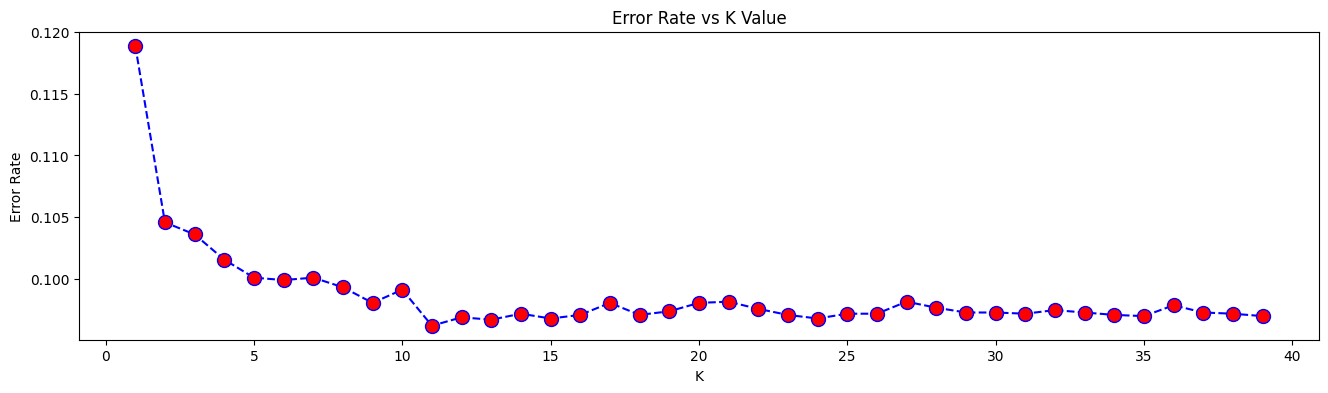

In [55]:
plt.figure(figsize=(16,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Minimum error:-', min(error_rate), 'at K=', error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9037583762260852 at K = 10


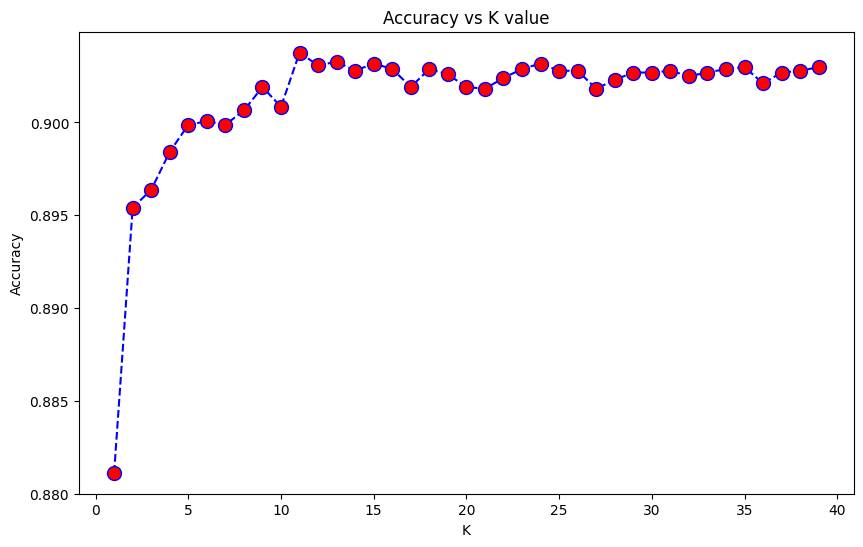

In [61]:
plt.figure(figsize=(16,4))
plt.plot(range(1,40), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [62]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(s.fit_transform(x_smote),y_smote)

classifier(knn, s.fit_transform(x_smote), s.transform(x_test),y_smote,y_test)

Train accuracy is: 0.9341701941322434
Test accuracy is: 0.8884141011945227

Train ROC is: 0.9341701941322434
Test ROC is: 0.7222955407894048

F score is: 0.5049547608789314
Precision is: 0.5017123287671232
Recall is: 0.5082393755420642


### **Bagging with KNN as Base Model**

In [63]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),n_estimators=5)

classifier(model.fit(s.fit_transform(x_smote),y_smote), s.fit_transform(x_smote), s.transform(x_test),y_smote,y_test)

Train accuracy is: 0.9355750985257627
Test accuracy is: 0.8877342915412256

Train ROC is: 0.9355750985257626
Test ROC is: 0.7378295446698824

F score is: 0.5207296849087893
Precision is: 0.4988085782366958
Recall is: 0.5446660884648742


### **Modelling with Decision Tree**

Not using balanced data with tree based models because they can handle imbalace pretty well so whynot.

In [64]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)
classifier(dtree, x_train, x_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8896766048363601

Train ROC is: 1.0
Test ROC is: 0.7283119789449563

F score is: 0.5136986301369862
Precision is: 0.5071851225697379
Recall is: 0.5203816131830009


In [65]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_smote,y_smote)
classifier(dtree, x_smote, x_test, y_smote,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8862775565698747

Train ROC is: 1.0
Test ROC is: 0.7502733084752091

F score is: 0.5310372446936323
Precision is: 0.49330357142857145
Recall is: 0.575021682567216


### **Tuning Hyperparemeters Decision Tree**

In [67]:
param_grid = {'max_depth': np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
              'min_samples_leaf': np.arange(3,30),
              'min_samples_split': np.arange(3,30),
              'criterion': ('gini','entropy')}

random_search(DecisionTreeClassifier(random_state=0), param_grid, x_train, x_test, y_train, y_test)

Best parameters are:  {'min_samples_split': 27, 'min_samples_leaf': 29, 'max_depth': 7, 'criterion': 'entropy'}

Best estimator is:  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=29,
                       min_samples_split=27, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.919523485804927
Test accuracy is: 0.9166747596387297

Train ROC is: 0.7723065271483794
Test ROC is: 0.7658724738765851

F score is: 0.6056985294117647
Precision is: 0.6441837732160313
Recall is: 0.5715524718126627


### **Decision Tree Based Bagging**

In [68]:
kfold = model_selection.KFold(n_splits=3)

# bagging classifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=5,
                                                                min_samples_leaf=25,
                                                                max_depth=8,
                                                                criterion='gini'),n_estimators=500)

classifier(model.fit(x_train,y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9248648473665468
Test accuracy is: 0.9199766922404584

Train ROC is: 0.7781953536619552
Test ROC is: 0.7654577924073455

F score is: 0.6131455399061033
Precision is: 0.6683725690890481
Recall is: 0.5663486556808326


### **Modelling with Random Forest**

In [69]:
rforest = RandomForestClassifier(random_state= 0)
classifier(rforest.fit(x_train,y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9999676281117478
Test accuracy is: 0.914441099349325

Train ROC is: 0.9998566102667049
Test ROC is: 0.7411186364605551

F score is: 0.5754216867469879
Precision is: 0.6475054229934925
Recall is: 0.5177797051170858


In [70]:
params = {'n_estimators' : np.arange(100,1000, 100),
              'max_depth' : np.arange(3,20,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}

random_search(RandomForestClassifier(random_state=0),params,x_train,x_test,y_train,y_test)

Best parameters are:  {'n_estimators': 900, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'gini'}

Best estimator is:  RandomForestClassifier(max_depth=19, min_samples_leaf=9, min_samples_split=9,
                       n_estimators=900, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.9389142468680198
Test accuracy is: 0.9174516849567835

Train ROC is: 0.7868647710282999
Test ROC is: 0.7227282910646576

F score is: 0.5614035087719299
Precision is: 0.6929936305732484
Recall is: 0.47181266261925414


### **Using ANN**

In [72]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(s.fit_transform(x_smote), y_smote,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100


2023-09-05 16:56:28.040754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


3673/3673 [==============================] - 2s 600us/step - loss: 0.4131 - accuracy: 0.7973 - val_loss: 0.6751 - val_accuracy: 0.7012
Epoch 2/100
3673/3673 [==============================] - 2s 572us/step - loss: 0.2823 - accuracy: 0.8802 - val_loss: 0.4606 - val_accuracy: 0.8540
Epoch 3/100
3673/3673 [==============================] - 2s 563us/step - loss: 0.2557 - accuracy: 0.8938 - val_loss: 0.3905 - val_accuracy: 0.8786
Epoch 4/100
3673/3673 [==============================] - 2s 557us/step - loss: 0.2471 - accuracy: 0.8963 - val_loss: 0.3474 - val_accuracy: 0.8919
Epoch 5/100
3673/3673 [==============================] - 2s 562us/step - loss: 0.2422 - accuracy: 0.8979 - val_loss: 0.3318 - val_accuracy: 0.8935
Epoch 6/100
3673/3673 [==============================] - 2s 575us/step - loss: 0.2386 - accuracy: 0.8982 - val_loss: 0.3047 - val_accuracy: 0.9022
Epoch 7/100
3673/3673 [==============================] - 2s 555us/step - loss: 0.2355 - accuracy: 0.8993 - val_loss: 0.3094 - val_

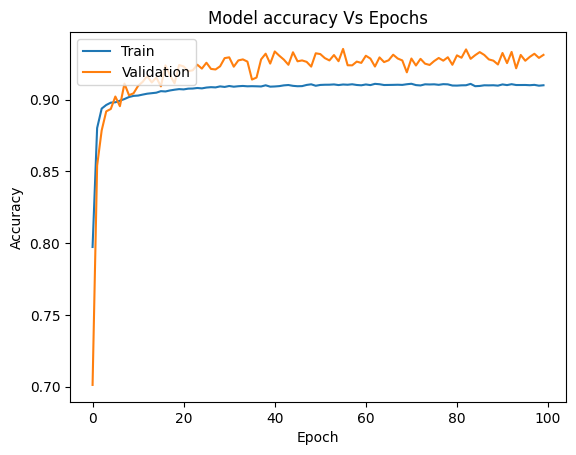

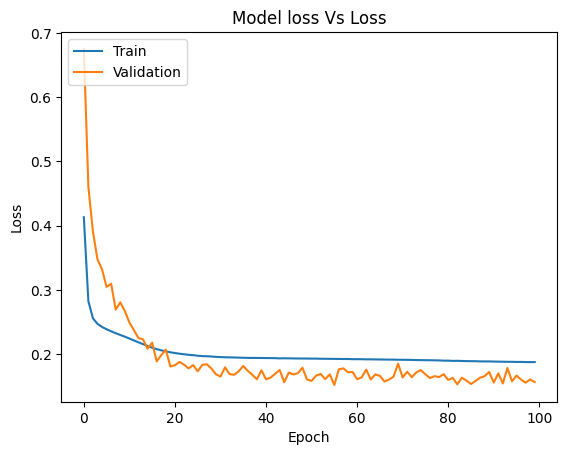

In [78]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()